<a href="https://colab.research.google.com/github/OrugboGodswill/OIBSIP/blob/main/Car_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
## Import all Dependency
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('car data.csv')
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
#drop missing value
df.dropna(inplace=True)
df.isnull().count()


Car_Name         301
Year             301
Selling_Price    301
Present_Price    301
Driven_kms       301
Fuel_Type        301
Selling_type     301
Transmission     301
Owner            301
dtype: int64

In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
duplicate_rows = df[df.duplicated(keep=False)]
duplicate_rows

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
15,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
51,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [9]:
duplicated_rows = df[df.duplicated(keep='first')]
duplicated_rows

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [10]:
df_cleaned = df.drop(duplicated_rows.index)

In [20]:
# Encode categorical variables
# change categorical columns type to numeric value using Scikit-Learn LableEncoder
# By Importing the Scikit Learn Package

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Fuel_Type'] = label_encoder.fit_transform(df['Fuel_Type'])
df['Transmission'] = label_encoder.fit_transform(df['Transmission'])
df['Selling_type'] = label_encoder.fit_transform(df['Selling_type'])
df['Car_Name'] = label_encoder.fit_transform(df['Car_Name'])


In [21]:
df['Fuel_Type']

0      2
1      1
2      2
3      2
4      1
      ..
296    1
297    2
298    2
299    1
300    2
Name: Fuel_Type, Length: 301, dtype: int64

In [22]:
# Feature Selection
# The Important Features are 	Car_Name,	Year,	Present_Price,	Driven_kms,	Fuel_Type,	Transmission,	Owner.
# Y is the dependent variable
# X is the independent variable
## Preparing the data for Modelling

X = df.drop(['Selling_Price'],axis=1)
y = df['Selling_Price']

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection and Training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions on the testing set
y_prediction = model.predict(X_test)

In [27]:
y.head(10)

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
5    9.25
6    6.75
7    6.50
8    8.75
9    7.45
Name: Selling_Price, dtype: float64

In [23]:
y_prediction

array([ 2.97491895,  8.32612847,  6.0161235 , -1.38172371,  9.27940633,
        7.06928951,  1.30824607,  0.74154082,  1.38400041,  7.12180339,
        8.69584861,  0.54647028,  8.53755625,  3.52559619,  6.461831  ,
        3.03854609,  0.42667599, 10.91368809,  1.74417072,  2.29195225,
        0.37662088,  7.76798131,  6.17213021,  2.60498874,  0.84816117,
        3.69954086,  5.35530228,  2.8301809 ,  2.11511377,  1.72142608,
        0.42317787,  8.82614032, -0.60965683,  2.2555362 ,  8.22536901,
        4.57720813,  7.36810266,  7.71076849,  2.85141326,  8.10873551,
        3.98313701,  4.3789598 ,  4.40312603,  0.55049612,  6.91084914,
        0.46147134,  7.43952702, 11.46949761,  3.12745561,  4.9423416 ,
        6.81243382,  2.15400554, 20.55225973, 16.78374986,  7.09182007,
        9.8550337 ,  4.48118171,  8.65492286,  1.84936153,  7.64066408,
        0.21224031])

In [13]:
df['Selling_Price']

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [ ]:
## Evaluting the performance by Linear Regression Model
mse = mean_squared_error(y_test, y_prediction)
r2 = r2_score(y_test, y_prediction)
print("Mean Square Error is :", mse)
print("R-Squared score is :",r2)

Mean Square Error is : 3.5315798889713164
R-Squared score is : 0.8466902419662664


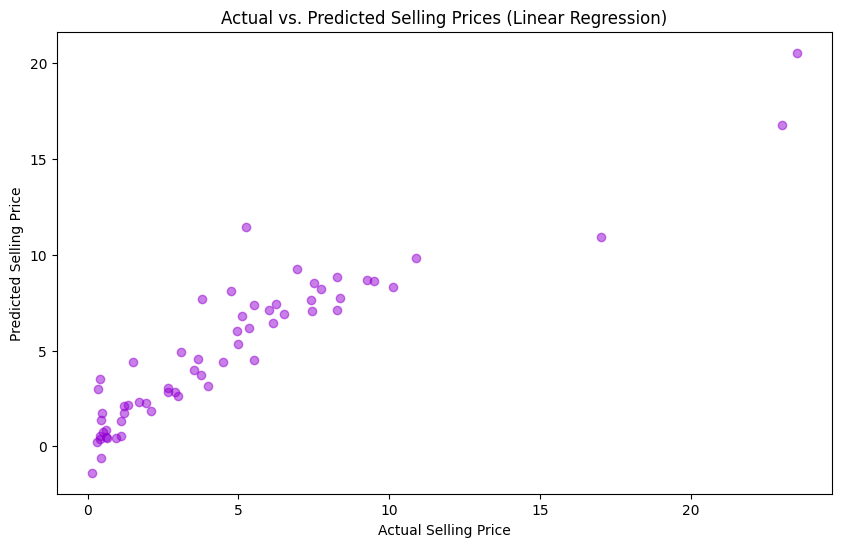

In [28]:
# Visualization of Actual Selling Prices & Predicted Selling Price
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_prediction, alpha=0.5, color='darkviolet')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs. Predicted Selling Prices (Linear Regression)')
plt.show()